Mounted at /content/drive
Extracting dataset...

Dataset Statistics:
--------------------------------------------------
Very mild Dementia: 13,725 images
Non Demented: 67,222 images
Mild Dementia: 5,002 images
Moderate Dementia: 488 images
--------------------------------------------------
Total images: 86,437


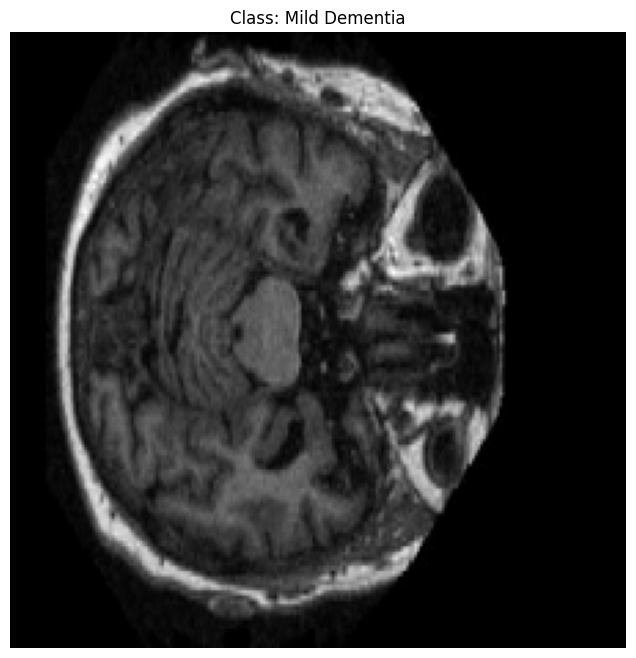


Image shape after preprocessing: (224, 224, 1)
Value range: 0.0 to 0.9490196078431372


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set up paths
import os
import zipfile
import shutil
from pathlib import Path

# Define paths - adjust the DRIVE_PATH to where your Data.zip is located
DRIVE_PATH = "/content/drive/MyDrive"
ZIP_PATH = os.path.join(DRIVE_PATH, "Data.zip")
EXTRACT_PATH = "/content/dataset"  # Temporary extraction in Colab VM

# Create extraction directory
os.makedirs(EXTRACT_PATH, exist_ok=True)

def setup_data():
    """Extract data and provide dataset statistics"""
    print("Extracting dataset...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)

    # Get dataset statistics
    class_counts = {}
    total_images = 0

    data_dir = os.path.join(EXTRACT_PATH, "Data")
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
            total_images += num_images

    print("\nDataset Statistics:")
    print("-" * 50)
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count:,} images")
    print("-" * 50)
    print(f"Total images: {total_images:,}")

    return data_dir

def get_data_paths():
    """
    Returns lists of file paths and corresponding labels
    """
    data_dir = os.path.join(EXTRACT_PATH, "Data")
    image_paths = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Sort to ensure consistent label ordering

    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_files = [os.path.join(class_path, f) for f in os.listdir(class_path)]
            image_paths.extend(class_files)
            labels.extend([class_idx] * len(class_files))

    return image_paths, labels, class_names

# Extract data if not already extracted
if not os.path.exists(os.path.join(EXTRACT_PATH, "Data")):
    data_dir = setup_data()

# Load and preprocess a sample image to verify everything works
import cv2
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess a single image"""
    # Read image in grayscale since MRIs are grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to target size
    img = cv2.resize(img, target_size)

    # Normalize to [0,1]
    img = img / 255.0

    # Add channel dimension for keras
    img = img[..., None]

    return img

# Load sample image and display
image_paths, labels, class_names = get_data_paths()
sample_img = load_and_preprocess_image(image_paths[0])

plt.figure(figsize=(8, 8))
plt.imshow(sample_img[:,:,0], cmap='gray')
plt.title(f'Class: {class_names[labels[0]]}')
plt.axis('off')
plt.show()

print("\nImage shape after preprocessing:", sample_img.shape)
print("Value range:", sample_img.min(), "to", sample_img.max())